In [33]:
import pandas as pd
import numpy as np
import os
import time
import math
from datetime import date
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# %matplotlib inline 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc
from sklearn.grid_search import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from Class_tree import DecisionTree

In [249]:
df = pd.read_csv("C:/Users/Ashish/Documents/R/x_train_tam.csv")
df_test= pd.read_csv("C:/Users/Ashish/Documents/R/x_test_tam.csv")

In [236]:
df_test['payment_types'].value_counts()

Card    17
Cash    14
Name: payment_types, dtype: int64

In [253]:
df= df[['trip_seconds', 'trip_miles', 'trip_total', 'companies',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'hourfloat', 'hourfloat_sin', 'hourfloat_cos','payment_types',
        'day_num', 'day_sin','day_cos','yearfloat', 'year_cos','year_sin', 'monthfloat', 
        'month_cos', 'month_sin', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'AWND', 'day_cat', 'Special_day']]
df_test= df_test[['trip_seconds', 'trip_miles', 'trip_total', 'companies',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'payment_types',
       'dropoff_longitude', 'hourfloat','hourfloat_sin', 'hourfloat_cos','day_num', 'day_sin',
       'day_cos', 'yearfloat', 'year_cos','year_sin', 'monthfloat', 'month_cos', 'month_sin',
        'PRCP', 'SNWD', 'SNOW', 'TMAX', 'AWND', 'day_cat', 'Special_day']]

In [175]:
df['payment_types'].value_counts()

KeyError: 'payment_types'

In [135]:
cat_map={'Taxi Affiliation Services':1,'Dispatch Taxi Affiliation':2,\
 'Choice Taxi Association':3,'Northwest Management LLC':4,\
 'KOAM Taxi Association':5,'other':6}

cat1_map= {'Cash':1,'Card':2,'Other':3}
cat2_map= {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7}
df['companies']=df['companies'].map(cat_map)
df['payment_types']=df['payment_types'].map(cat1_map)
df['day_cat']= df['day_cat'].map(cat2_map)

df_test['companies']=df_test['companies'].map(cat_map)
df_test['payment_types']=df_test['payment_types'].map(cat1_map)
df_test['day_cat']= df_test['day_cat'].map(cat2_map)

KeyError: 'payment_types'

In [254]:
df_nominal= df[['companies', 'day_cat', 'Special_day', 'payment_types']]
df_encoded=pd.get_dummies(df_nominal,columns=['companies', 'day_cat', 'Special_day', 'payment_types'],drop_first=False)

df_nominal_test= df_test[['companies','day_cat' , 'Special_day', 'payment_types']]
df_encoded_test=pd.get_dummies(df_nominal_test,columns=['companies', 'day_cat', 'Special_day', 'payment_types'],drop_first=False)

In [257]:
df_interval=df.drop(['companies', 'day_cat', 'Special_day', 'payment_types']\
                      ,axis=1).copy()
df_interval= df_interval.apply(lambda x: x.fillna(x.mean()),axis=0)

df_interval_test=df_test.drop(['companies', 'day_cat', 'Special_day', 'payment_types']\
                      ,axis=1).copy()
df_interval_test= df_interval_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [258]:
df_final=pd.concat([df_interval,df_encoded],ignore_index=False,axis=1)
df_final.head()

df_final_test=pd.concat([df_interval_test,df_encoded_test],ignore_index=False,axis=1)

In [259]:
df_final.columns

Index(['trip_seconds', 'trip_miles', 'trip_total', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'hourfloat', 'hourfloat_sin', 'hourfloat_cos', 'day_num', 'day_sin',
       'day_cos', 'yearfloat', 'year_cos', 'year_sin', 'monthfloat',
       'month_cos', 'month_sin', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'AWND',
       'companies_Choice Taxi Association',
       'companies_Dispatch Taxi Affiliation',
       'companies_KOAM Taxi Association', 'companies_Northwest Management LLC',
       'companies_Taxi Affiliation Services', 'companies_other',
       'day_cat_Friday', 'day_cat_Monday', 'day_cat_Saturday',
       'day_cat_Sunday', 'day_cat_Thursday', 'day_cat_Tuesday',
       'day_cat_Wednesday', 'Special_day_0', 'Special_day_1',
       'payment_types_Card', 'payment_types_Cash', 'payment_types_Other'],
      dtype='object')

In [260]:
df_final_test.columns

Index(['trip_seconds', 'trip_miles', 'trip_total', 'pickup_latitude',
       'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude',
       'hourfloat', 'hourfloat_sin', 'hourfloat_cos', 'day_num', 'day_sin',
       'day_cos', 'yearfloat', 'year_cos', 'year_sin', 'monthfloat',
       'month_cos', 'month_sin', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'AWND',
       'companies_Choice Taxi Association',
       'companies_Dispatch Taxi Affiliation',
       'companies_KOAM Taxi Association', 'companies_Northwest Management LLC',
       'companies_Taxi Affiliation Services', 'companies_other',
       'day_cat_Friday', 'day_cat_Monday', 'day_cat_Saturday',
       'day_cat_Sunday', 'day_cat_Thursday', 'day_cat_Tuesday',
       'day_cat_Wednesday', 'Special_day_0', 'Special_day_1',
       'payment_types_Card', 'payment_types_Cash', 'payment_types_Other'],
      dtype='object')

In [261]:
predictor_space=df_final.drop('trip_total',axis=1)

lr=LinearRegression()
X=np.asarray(df_final.drop('trip_total',axis=1))   
y= np.asarray(df_final['trip_total'])

Xt=np.asarray(df_final_test.drop('trip_total',axis=1))   
yt= np.asarray(df_final_test['trip_total'])
lr.fit(X,y)

def display_metrics(lr, X, y):
        predictions = lr.predict(X)
        print("\nModel Metrics")
        print("{:.<23s}{:15d}".format('Observations', X.shape[0]))
        print("{:.<23s}{:15d}".format('Coefficients', X.shape[1]+1))
        print("{:.<23s}{:15d}".format('DF Error', X.shape[0]-X.shape[1]-1))
        R2 = r2_score(y, predictions)
        print("{:.<23s}{:15.4f}".format('R-Squared', R2))
        print("{:.<23s}{:15.4f}".format('Avg Squared Error', \
                      mean_squared_error(y,predictions)))
        print("{:.<23s}{:15.4f}".format('Square Root ASE', \
                      math.sqrt(mean_squared_error(y,predictions))))
        
def display_split_metrics(lr, Xt, yt, Xv, yv):
        predict_t = lr.predict(Xt)
        predict_v = lr.predict(Xv)
        print("\n")
        print("{:.<23s}{:>15s}{:>15s}".format('Model Metrics', \
                                      'Training', 'Validation'))
        print("{:.<23s}{:15d}{:15d}".format('Observations', \
                                          Xt.shape[0], Xv.shape[0]))
        print("{:.<23s}{:15d}{:15d}".format('Coefficients', \
                                          Xt.shape[1]+1, Xv.shape[1]+1))
        print("{:.<23s}{:15d}{:15d}".format('DF Error', \
                      Xt.shape[0]-Xt.shape[1]-1, Xv.shape[0]-Xv.shape[1]-1))
        R2t = r2_score(yt, predict_t)
        R2v = r2_score(yv, predict_v)
        print("{:.<23s}{:15.4f}{:15.4f}".format('R-Squared', R2t, R2v))
        print("{:.<23s}{:15.4f}{:15.4f}".format('RMSE', \
                      math.sqrt(mean_squared_error(yt,predict_t)), \
                      math.sqrt(mean_squared_error(yv,predict_v))))
        
display_split_metrics(lr, X, y, Xt, yt)



Model Metrics..........       Training     Validation
Observations...........          33776           4923
Coefficients...........             42             42
DF Error...............          33734           4881
R-Squared..............         0.5258         0.5294
RMSE...................         3.0326         3.2577


In [74]:
x

In [27]:
X=np.asarray(df_final.drop('trip_total',axis=1))   
y= np.asarray(df_final['trip_total'])

Xt=np.asarray(df_final_test.drop('trip_total',axis=1))   
yt= np.asarray(df_final_test['trip_total'])

In [48]:
rfc = RandomForestRegressor(n_estimators=10, \
                    max_depth=50, min_samples_split=2, \
                    min_samples_leaf=1, max_features='auto', \
                    n_jobs=1, bootstrap=True, random_state=12345)
rfc= rfc.fit(X, y)

In [55]:
y_pred= rfc.predict(Xt)

In [63]:
print('The rmse of prediction is:', mean_squared_error(yt, y_pred) ** 0.5)
print('The R2 score of prediction is:', r2_score(yt, y_pred))

The rmse of prediction is: 2.748899461094746
The R2 score of prediction is: 0.6649417622867426


In [57]:
rfc.score(Xt,yt)

0.6649417622867426

In [60]:
np.mean(yt.ravel() == rfc.predict(Xt))

0.0004062563477554337

In [262]:
import warnings
warnings.filterwarnings("ignore")
estimator = RandomForestRegressor(n_estimators=20, n_jobs=-1)


# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, \
                verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, \
                          n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs,\
                         cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_,\
            gs.scorer_)
    print ("Best score: ", gs.best_score_)
    best = gs.best_estimator_
    return best

# Define a grid of parameters over which to optimize the random forest
# We will figure out which number of trees is optimal
parameters = {"n_estimators": [10,20,30],
              "max_features":  ["auto","sqrt","log2"]
              "max_depth": [50]}
best = cv_optimize(estimator, parameters, X, y, n_folds=5,\
                    score_func='mean_squared_error', verbose=3)


# Fit the best Random Forest and calculate R^2 values for training and test sets
reg=best.fit(X, y)
training_accuracy = reg.score(X, y)
test_accuracy = reg.score(Xt, yt)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.4f" % (training_accuracy))
print ("R^2 on test data:     %0.4f" % (test_accuracy))


# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(reg.predict(Xt),yt))
print ("RMSE = %0.3f (this is in log-space!)" % rmse)
print ("So two thirds of the records would be a factor of less than %0.2f \
	away from the real value." % np.power(10,rmse))

import operator
dict_feat_imp = dict(zip(list(predictor_space.columns.values),reg.feature_importances_))

sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-5.560454 -  10.7s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-4.304793 -  14.7s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.5s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-3.882028 -  13.8s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-4.927748 -  13.3s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-8.082303 -  12.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


BEST {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50} -5.351471499027713 [mean: -5.35147, std: 1.47888, params: {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50}] make_scorer(mean_squared_error, greater_is_better=False)
Best score:  -5.351471499027713
############# based on standard predict ################
R^2 on training data: 0.9667
R^2 on test data:     0.6886
RMSE = 2.650 (this is in log-space!)
So two thirds of the records would be a factor of less than 446.68 	away from the real value.


[('trip_miles', 0.3735388411222219),
 ('trip_seconds', 0.2453465630679262),
 ('day_num', 0.036689531518594054),
 ('year_cos', 0.03607105341623485),
 ('hourfloat', 0.03162420121324782),
 ('hourfloat_cos', 0.031536245361991656),
 ('day_cos', 0.024416904726646108),
 ('dropoff_longitude', 0.01948967670875828),
 ('hourfloat_sin', 0.019193579860401697),
 ('day_sin', 0.018841642075004838),
 ('yearfloat', 0.017775420847361348),
 ('pickup_longitude', 0.017290750362062072),
 ('TMAX', 0.01695791542241292),
 ('pickup_latitude', 0.01639340300574509),
 ('year_sin', 0.016166857927784745),
 ('AWND', 0.01587416510154178),
 ('dropoff_latitude', 0.015865063905601887),
 ('payment_types_Card', 0.01063101915600979),
 ('PRCP', 0.007427708740120232),
 ('payment_types_Cash', 0.004969008490941632),
 ('month_sin', 0.0026478292941731294),
 ('month_cos', 0.002080919561107453),
 ('companies_other', 0.0019635575257404368),
 ('SNWD', 0.0019114076460425098),
 ('monthfloat', 0.0017523922254493987),
 ('companies_Taxi Af

In [230]:
csv=pd.DataFrame(sorted_features)

In [220]:
csv.to_csv("RF_weekly.csv")

<Figure size 432x288 with 0 Axes>

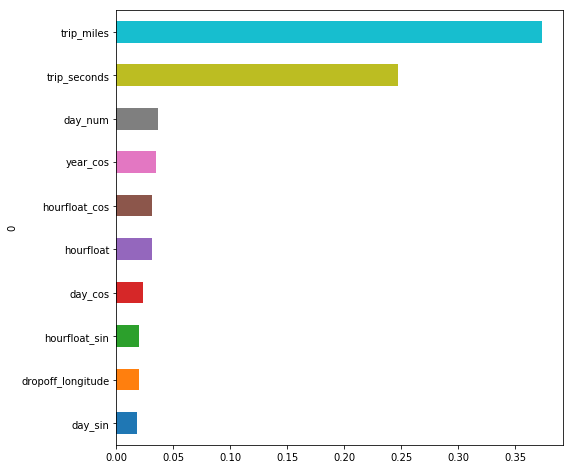

In [167]:
plt.figure();
csv[[0,1]].tail(10).plot(kind='barh', x=0, y=1,legend=False, figsize=(8, 8));

In [19]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'auc',
    'num_leaves': 60,
    'learning_rate': 0.01,
    'bagging_fraction': 0.85,
    'bagging_freq': 20,
    'verbose': 1,
    'max_bin':200
    }

In [129]:
X=df_final.drop('trip_total',axis=1).copy() 
y= df_final['trip_total'].copy()

Xt=df_final_test.drop('trip_total',axis=1).copy() 
yt= df_final_test['trip_total'].copy()

In [66]:
lgb_train = lgb.Dataset(X, y)

In [67]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000)

In [68]:
y_pred = gbm.predict(Xt, num_iteration=gbm.best_iteration)

In [69]:
print('The rmse of prediction is:', mean_squared_error(yt, y_pred) ** 0.5)

The rmse of prediction is: 2.4222848480135117


In [70]:
print('The R2 score of prediction is:', r2_score(yt, y_pred))

The R2 score of prediction is: 0.7398325185575463


In [60]:
gain = gbm.feature_importance('gain')

In [61]:
ft = pd.DataFrame({'feature':gbm.feature_name(), 'split':gbm.feature_importance('split'), 'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=True)
print(ft.tail(25))

               feature       gain  split
33      day_cat_Friday   0.049832     81
23         Special_day   0.071349    213
36      day_cat_Sunday   0.080945     40
19                SNWD   0.110918    509
17           month_sin   0.137492    270
18                PRCP   0.260952   1223
31  payment_types_Cash   0.347165    313
22                AWND   0.552628   2629
21                TMAX   0.827084   2974
14            year_sin   0.874747   2611
4     dropoff_latitude   1.233444   2849
2      pickup_latitude   1.246615   2618
10             day_sin   1.329220   2774
3     pickup_longitude   1.365145   2369
5    dropoff_longitude   1.398045   2458
12           yearfloat   1.726752   3572
30  payment_types_Card   1.726773   1167
7        hourfloat_sin   1.795506   2677
11             day_cos   1.947181   2787
8        hourfloat_cos   2.499452   2284
13            year_cos   3.510427   4431
9              day_num   3.763217   3566
6            hourfloat   4.165057   4649
0         trip_s

<Figure size 432x288 with 0 Axes>

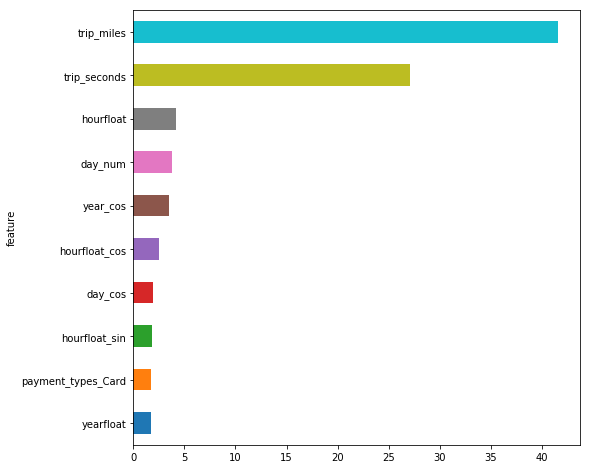

In [64]:
plt.figure();
ft[['feature','gain']].tail(10).plot(kind='barh', x='feature', y='gain', legend=False, figsize=(8, 8));

In [15]:
predictor_space=df_final.drop('trip_total',axis=1)

In [13]:
from lightgbm import LGBMRegressor

In [264]:
import warnings
warnings.filterwarnings("ignore")
estimator = LGBMRegressor(num_boost_round=1000, n_jobs=-1)


# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=10, score_func=None, \
                verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, \
                          n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs,\
                         cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_,\
            gs.scorer_)
    print ("Best score: ", gs.best_score_)
    best = gs.best_estimator_
    return best

# Define a grid of parameters over which to optimize the random forest
# We will figure out which number of trees is optimal
parameters = {'boosting_type': ['gbdt'],
            'objective': ['regression'],
            'metric': ['auc'],
            'num_leaves': [20,40,60,80],
            'learning_rate': [0.01,0.1],
            'bagging_fraction': [0.85],
            'bagging_freq': [20],
            'verbose': [1],
            'max_bin':[200]}
best = cv_optimize(estimator, parameters, X, y, n_folds=5,\
                    score_func='mean_squared_error', verbose=3)


# Fit the best Random Forest and calculate R^2 values for training and test sets
reg=best.fit(X, y)
training_accuracy = reg.score(X, y)
test_accuracy = reg.score(Xt, yt)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.4f" % (training_accuracy))
print ("R^2 on test data:     %0.4f" % (test_accuracy))


# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(reg.predict(Xt),yt))
print ("RMSE = %0.3f (this is in log-space!)" % rmse)
print ("So two thirds of the records would be a factor of less than %0.2f \
	away from the real value." % np.power(10,rmse))

import operator
dict_feat_imp = dict(zip(list(predictor_space.columns.values),reg.feature_importances_))

sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1 
[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1, score=-4.838368 -   6.5s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1, score=-3.662879 -   5.9s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.6s remaining:    0.0s


[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1, score=-3.301323 -   5.5s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1 
[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1, score=-4.357384 -   5.6s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1 
[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=20, objective=regression, verbose=1, score=-7.544558 -   5.6s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.01, max_bin=200, metric=auc, num_leaves=40, objecti

[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.1, max_bin=200, metric=auc, num_leaves=40, objective=regression, verbose=1, score=-3.502556 -   7.4s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.1, max_bin=200, metric=auc, num_leaves=40, objective=regression, verbose=1 
[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.1, max_bin=200, metric=auc, num_leaves=40, objective=regression, verbose=1, score=-3.200807 -   8.7s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.1, max_bin=200, metric=auc, num_leaves=40, objective=regression, verbose=1 
[CV]  bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.1, max_bin=200, metric=auc, num_leaves=40, objective=regression, verbose=1, score=-4.382397 -   8.0s
[CV] bagging_fraction=0.85, bagging_freq=20, boosting_type=gbdt, learning_rate=0.1, max_bin=200, metric=auc, num_leaves=40, objective=reg

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.7min finished


BEST {'bagging_fraction': 0.85, 'bagging_freq': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_bin': 200, 'metric': 'auc', 'num_leaves': 80, 'objective': 'regression', 'verbose': 1} -4.535155652554211 [mean: -4.74091, std: 1.50011, params: {'bagging_fraction': 0.85, 'bagging_freq': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_bin': 200, 'metric': 'auc', 'num_leaves': 20, 'objective': 'regression', 'verbose': 1}, mean: -4.58564, std: 1.48141, params: {'bagging_fraction': 0.85, 'bagging_freq': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_bin': 200, 'metric': 'auc', 'num_leaves': 40, 'objective': 'regression', 'verbose': 1}, mean: -4.54319, std: 1.47905, params: {'bagging_fraction': 0.85, 'bagging_freq': 20, 'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_bin': 200, 'metric': 'auc', 'num_leaves': 60, 'objective': 'regression', 'verbose': 1}, mean: -4.53516, std: 1.47882, params: {'bagging_fraction': 0.85, 'bagging_freq': 20, 'boosting_type': 'gbdt', 

[('year_cos', 6110),
 ('hourfloat', 6028),
 ('trip_miles', 6019),
 ('trip_seconds', 4987),
 ('yearfloat', 4804),
 ('day_num', 4589),
 ('TMAX', 4311),
 ('dropoff_latitude', 3998),
 ('day_cos', 3928),
 ('day_sin', 3660),
 ('year_sin', 3644),
 ('AWND', 3595),
 ('dropoff_longitude', 3519),
 ('hourfloat_sin', 3509),
 ('pickup_latitude', 3476),
 ('pickup_longitude', 3182),
 ('hourfloat_cos', 2961),
 ('PRCP', 1816),
 ('payment_types_Card', 1388),
 ('SNWD', 679),
 ('payment_types_Cash', 437),
 ('month_sin', 361),
 ('SNOW', 311),
 ('companies_other', 281),
 ('Special_day_0', 265),
 ('companies_Taxi Affiliation Services', 201),
 ('monthfloat', 153),
 ('day_cat_Thursday', 140),
 ('companies_Dispatch Taxi Affiliation', 118),
 ('day_cat_Monday', 113),
 ('day_cat_Tuesday', 110),
 ('day_cat_Friday', 99),
 ('companies_Northwest Management LLC', 76),
 ('day_cat_Sunday', 52),
 ('companies_Choice Taxi Association', 41),
 ('payment_types_Other', 20),
 ('day_cat_Wednesday', 11),
 ('day_cat_Saturday', 5),
 

In [222]:
csv=pd.DataFrame(sorted_features)
csv.to_csv("LGB_weekly.csv")

In [265]:
np.sqrt(mean_squared_error(reg.predict(X),y))

1.5277472903338416

<Figure size 432x288 with 0 Axes>

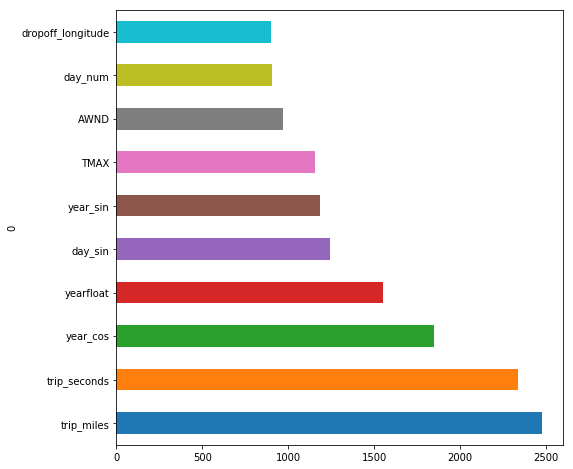

In [189]:
plt.figure();
pd.DataFrame(sorted_features)[[0,1]].head(10).plot(kind='barh', x=0, y=1,legend=False, figsize=(8, 8));

In [69]:
cv_results = lgb.cv(parameters, lgb_train, num_boost_round=1000, nfold=10, 
                    verbose_eval=20, early_stopping_rounds=40, stratified=False)

LightGBMError: b'Parameter max_bin should be of type int, got "50,100,200"'